The objective of this project is to perform customer segmentation analysis for a large supermarket chain. The task involves analyzing a dataset of 4000 customers, collected through loyalty cards, which includes variables such as customer age, gender, annual income, etc. The goal is to identify distinct customer segments using clustering analysis techniques in Python and present the findings in a concise and informative report.

In [1]:
import numpy as np
import pandas as pd
from markdown import markdown
df = pd.read_csv("data.csv")
df.head(5)

,Gender,Marital Status,Education,Settlement Size,Occupation,Income,Age
0,0,0,3,2,2,185611,50
1,0,1,1,0,1,114778,30
2,0,1,1,0,0,132788,34
3,0,1,3,2,2,209671,55
4,1,1,1,2,1,118593,44


### Variable Description:

<u>- Gender</u>: Biological sex (gender) of a customer **(0 male, 1: female)**


<u>- Marital Status</u>: Marittal Status of a customer **(0: single, 1: non-single (divorced / separated / married / widowed))**

<u>- Education</u>: Level of education of a customer **(0: other / unknown, 1: high school, 2: university, 3: graduate school)**

<u>- Settlement Size</u>: The size of the city that the customer lives in **(0: small city, 1: mid-sized city, 2: big city)**

<u>- Occupation</u>: Category of occupation of the customer **(0: unemployed / unskilled, 1: skilled employee / official, 2: management / self-employed / highly qualified employee / officer)**

<u>- Income</u>: Self-reported annual income in US dollars of the customer.

<u>- Age</u>: The age of the customer in years, calculated as current year minus the year of birth of the customer at the time of creation of the dataset.

In [2]:
df.describe()

,Gender,Marital Status,Education,Settlement Size,Occupation,Income,Age
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.489500,0.510500,1.708250,1.090000,1.200750,134353.792250,39.946250
std,0.499952,0.499952,1.024155,0.869246,0.526326,48533.567076,10.269724
min,0.000000,0.000000,0.000000,0.000000,0.000000,35832.000000,18.000000
25%,0.000000,0.000000,1.000000,0.000000,1.000000,97815.250000,32.000000
50%,0.000000,1.000000,1.000000,1.000000,1.000000,122607.000000,38.000000
75%,1.000000,1.000000,3.000000,2.000000,2.000000,165920.250000,47.000000
max,1.000000,1.000000,3.000000,2.000000,2.000000,309364.000000,76.000000


## 1. Clean and Prepare Data

In [3]:
print(df.dtypes) ## Checking data types of each column
print ("==============")
print("The number of rows in the dataset:", df.shape[0])
print("The number of columns in the dataset:", df.shape[1])

Gender             int64
Marital Status     int64
Education          int64
Settlement Size    int64
Occupation         int64
Income             int64
Age                int64
dtype: object
The number of rows in the dataset: 4000
The number of columns in the dataset: 7


With the fact the categorical columns understood as some numerical values described above, the data types look correct and no further modification.

### 1.1 Checking Duplicates

In [4]:
num_duplicates = df.duplicated().sum() # count duplicates
print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 7


### 1.2 Checking Missing values

In [5]:
for column in df.columns:
    print(f"The number of missing values in {column} is: {df[column].isna().sum()}")

The number of missing values in Gender is: 0
The number of missing values in Marital Status is: 0
The number of missing values in Education is: 0
The number of missing values in Settlement Size is: 0
The number of missing values in Occupation is: 0
The number of missing values in Income is: 0
The number of missing values in Age is: 0


There are no missing values in the dataset. Therefore, there is no need for data imputation.

## 2. Exploratory Data Analysis (EDA)

In [6]:
df.describe()

,Gender,Marital Status,Education,Settlement Size,Occupation,Income,Age
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.489500,0.510500,1.708250,1.090000,1.200750,134353.792250,39.946250
std,0.499952,0.499952,1.024155,0.869246,0.526326,48533.567076,10.269724
min,0.000000,0.000000,0.000000,0.000000,0.000000,35832.000000,18.000000
25%,0.000000,0.000000,1.000000,0.000000,1.000000,97815.250000,32.000000
50%,0.000000,1.000000,1.000000,1.000000,1.000000,122607.000000,38.000000
75%,1.000000,1.000000,3.000000,2.000000,2.000000,165920.250000,47.000000
max,1.000000,1.000000,3.000000,2.000000,2.000000,309364.000000,76.000000


From the descriptive statistics, we can see that there might be outliers in Income & Age columns. For example:
- In Income column, while 75% of observations are less than 165904, its highest value is 309364.
- Similarly, in Age, while 75% of observations are less than 47, its highest value is 76.

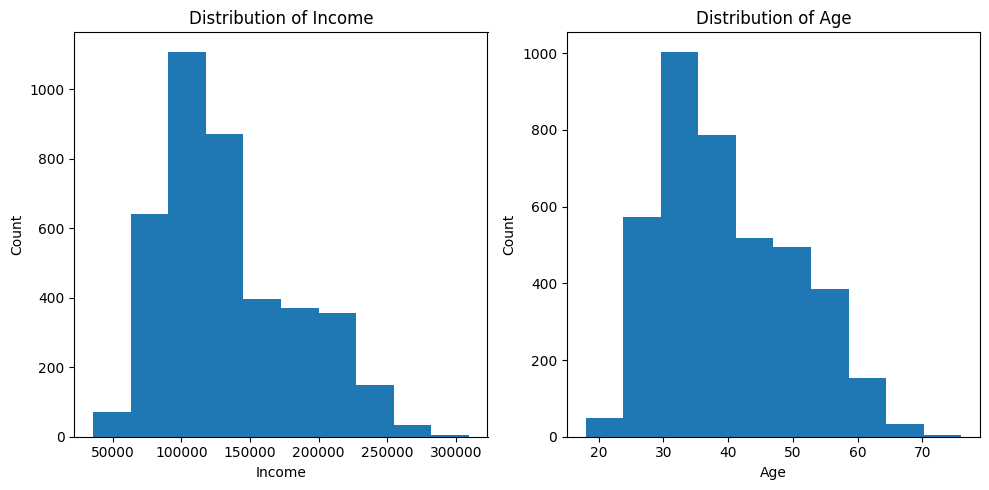

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
plt.title("Distribution of Income")
plt.hist(df["Income"])
plt.xlabel("Income")
plt.ylabel("Count")

plt.subplot(1,2,2)
plt.hist(df["Age"])
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

**Comment:** Income and Age has normal and unimodal distributions although it appears to be slightly right-skewed.

### 2.1 Visualization

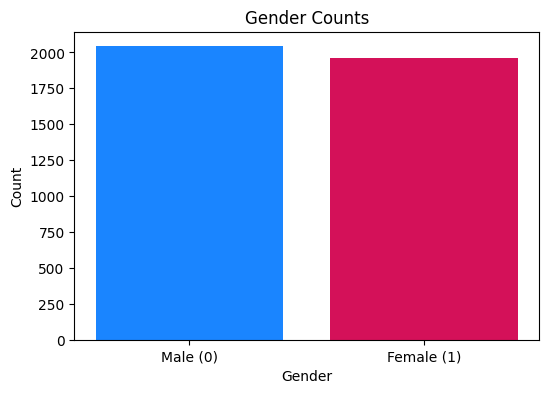

Gender
0    2042
1    1958
Name: count, dtype: int64

In [8]:
## Counts each category in Gender column
gender_counts = df['Gender'].value_counts()

## Draw a bar chart
plt.figure(figsize=(6, 4))
colors = ['#1A85FF', '#D41159']
plt.bar(gender_counts.index, gender_counts.values, color = colors)
plt.xticks([0, 1], ['Male (0)', 'Female (1)'])  # Set ticks to show 0 and 1 only
plt.ylabel("Count")
plt.xlabel("Gender")
plt.title("Gender Counts")
plt.show()

gender_counts

**Analysis:** The number of male consumers are roughly equal to that of females, with 50.95% males and 49.05% females buying items in their supermarket chain.

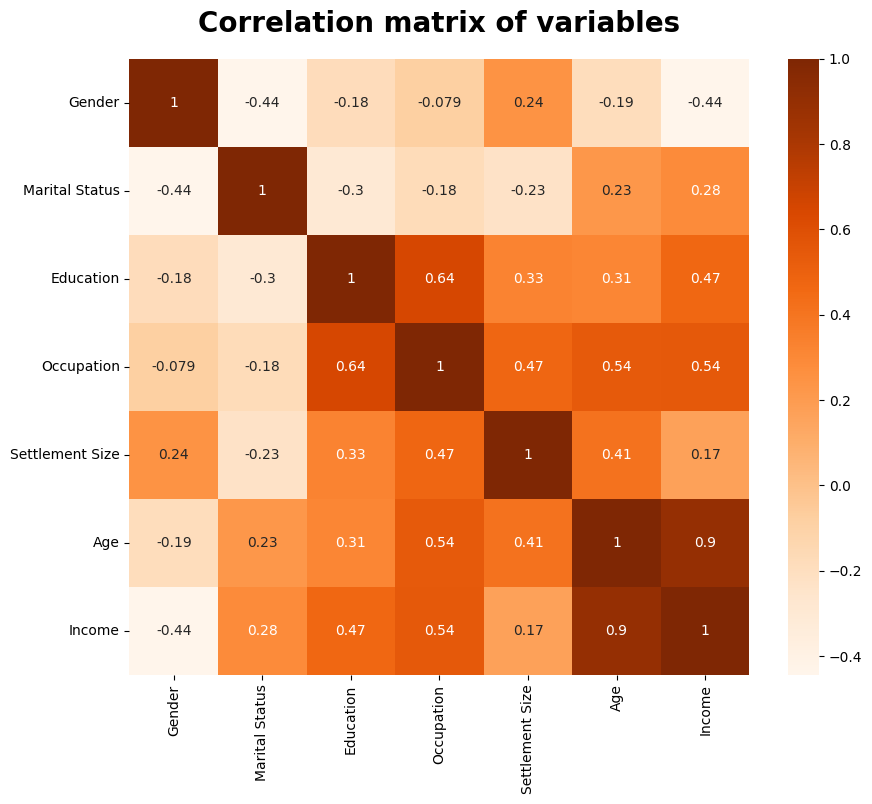

In [9]:
#Creating heatmap for finding the correlation between variables 
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = df[['Gender', 'Marital Status', 'Education', 'Occupation', 'Settlement Size', 'Age', 'Income']].corr()

# Set up the figure size
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='Oranges')

# Set the title
plt.title('Correlation matrix of variables', fontsize = 20, fontweight = 'bold', y = 1.03)

# Show the plot
plt.show()

Text(0.5, 0.98, '')

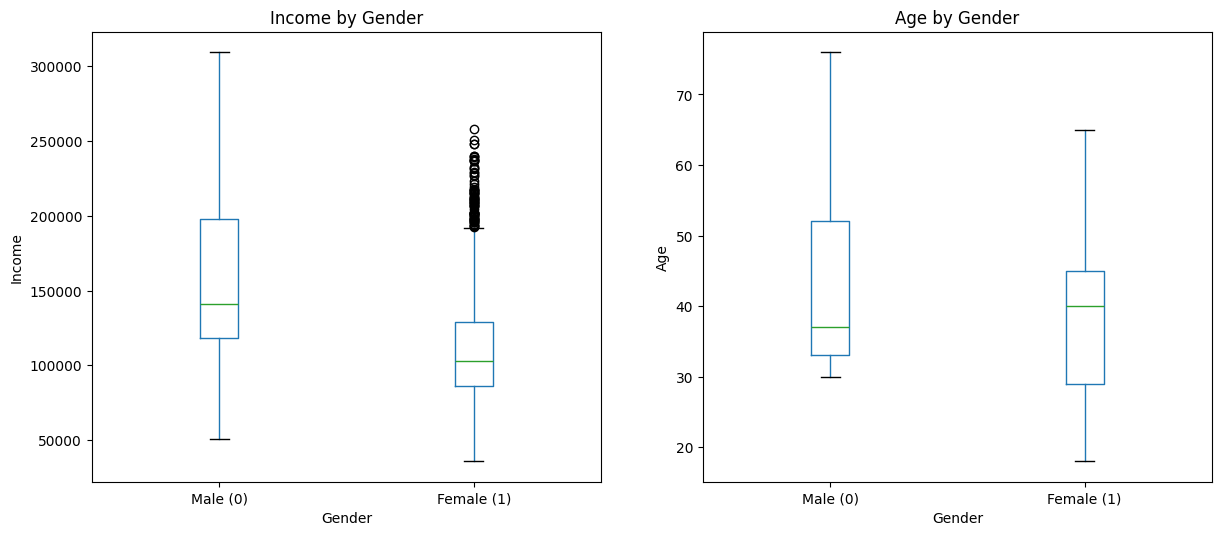

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Box plot for Income by Gender
df.boxplot(by='Gender', column=['Income'], grid=False, ax=ax[0])
ax[0].set_title('Income by Gender')
ax[0].set_xlabel('Gender')
ax[0].set_ylabel('Income')
ax[0].set_xticklabels(['Male (0)', 'Female (1)'])

# Box plot for Age by Gender
df.boxplot(by='Gender', column=['Age'], grid=False, ax=ax[1])
ax[1].set_title('Age by Gender')
ax[1].set_xlabel('Gender')
ax[1].set_ylabel('Age')
ax[1].set_xticklabels(['Male (0)', 'Female (1)'])

# Remove the automatic 'Boxplot grouped by ...' super title
plt.suptitle('')

**Analysis:**

- Income:
    - The spread of income (the distance between the maximum and minimum income values) generated by men is larger than females.
    - The IQR for males is also wider than for females, indicating more variability in male incomes within the inter-quartile range.
    - Females have a wider range of outliers compared to males, suggesting that there are more extreme income values among females.
    - Men income has a median income larger than females.

**-> Overall, while men show greater variability in both general income distribution and within the central range, and a higher median income, women display more extreme income values.**

- Age:
    - The spread of age (the distance between the maximum and minimum age values) generated by females is larger than men.
    - The IQR for males is quite similar to that of females.
    - Females income has a median age larger than males.

**-> Overall, while females exhibit a wider age range and a higher median age, the variability within the central range of ages is similar for both males and females.**

In [11]:
# Count how many marital statuses category observations are within each gender
marital_gender_counts = df.groupby(['Marital Status', 'Gender']).size().unstack(fill_value=0)

## It will show as below
##         Gender      0        1
## Marital Status 
##      0             555     1399
##      1            1475      555

marital_gender_counts.columns = ['Male', 'Female']  # Rename columns

##
## Count how many education levels are within each gender
education_gender_counts = df.groupby(['Education', 'Gender']).size().unstack(fill_value=0)
education_gender_counts.columns = ['Male', 'Female']   # Rename columns

##
## Count how many settlement size are within each gender
settlementSize_gender_counts = df.groupby(['Settlement Size', 'Gender']).size().unstack(fill_value=0)
settlementSize_gender_counts.columns = ['Male', 'Female']   # Rename columns

##
## Count how many settlement size are within each gender
occupation_gender_counts = df.groupby(['Occupation', 'Gender']).size().unstack(fill_value=0)
occupation_gender_counts.columns = ['Male', 'Female']   # Rename columns

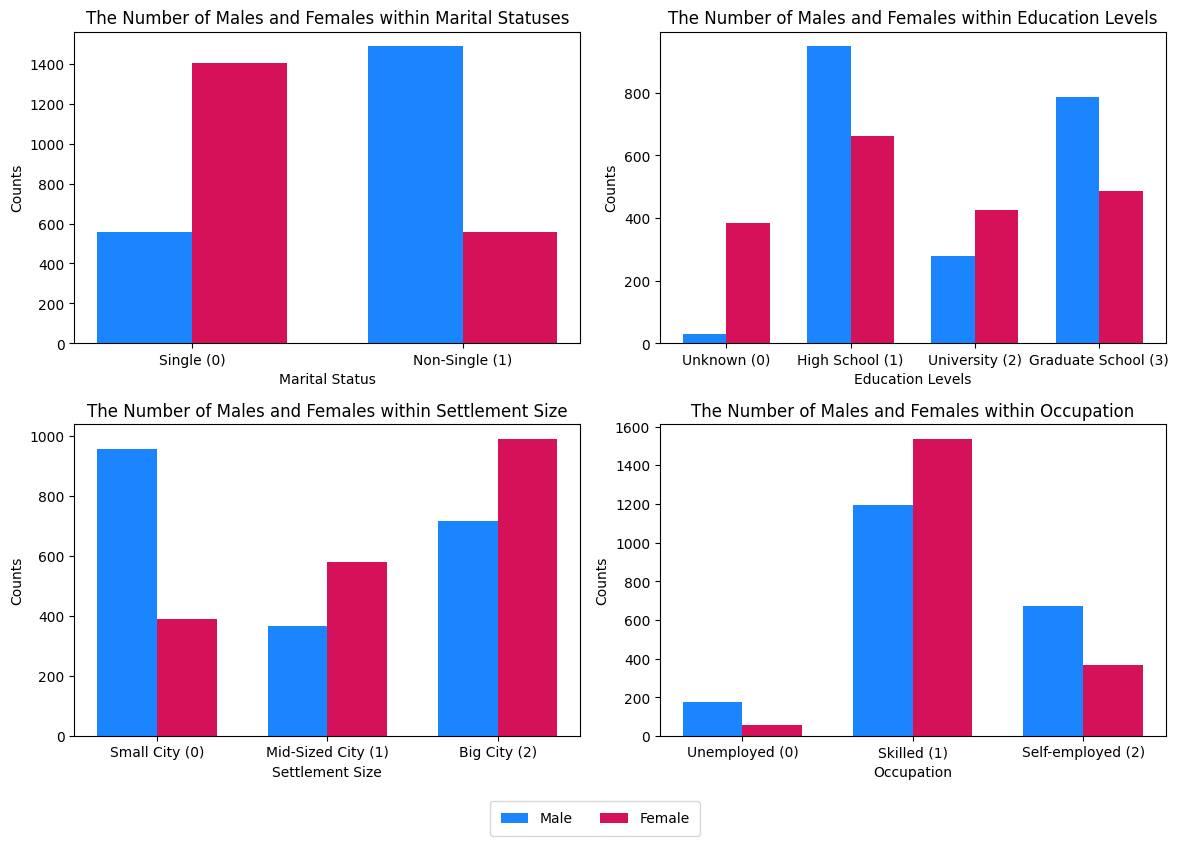

In [12]:
# Parameters
bar_width = 0.35  # width of bars

# Setup figure and axes for two subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))

# =============================================================
# First subplot for Marital Status
index = np.arange(len(marital_gender_counts))
ax1.bar(index, marital_gender_counts['Male'], bar_width, label='Male', color='#1A85FF')
ax1.bar(index + bar_width, marital_gender_counts['Female'], bar_width, label='Female', color='#D41159')
ax1.set_xlabel('Marital Status')
ax1.set_ylabel('Counts')
ax1.set_title('The Number of Males and Females within Marital Statuses')
ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(['Single (0)', 'Non-Single (1)'])

# =============================================================
# Second subplot for Education
index = np.arange(len(education_gender_counts))
ax2.bar(index, education_gender_counts['Male'], bar_width, label='Male', color='#1A85FF')
ax2.bar(index + bar_width, education_gender_counts['Female'], bar_width, label='Female', color='#D41159')
ax2.set_xlabel('Education Levels')
ax2.set_ylabel('Counts')
ax2.set_title('The Number of Males and Females within Education Levels')
ax2.set_xticks(index + bar_width / 2)
ax2.set_xticklabels(['Unknown (0)', 'High School (1)', "University (2)", "Graduate School (3)"]) 

# =============================================================
# Third subplot for Settlement Size
index = np.arange(len(settlementSize_gender_counts))
ax3.bar(index, settlementSize_gender_counts['Male'], bar_width, label='Male', color='#1A85FF')
ax3.bar(index + bar_width, settlementSize_gender_counts['Female'], bar_width, label='Female', color='#D41159')
ax3.set_xlabel('Settlement Size')
ax3.set_ylabel('Counts')
ax3.set_title('The Number of Males and Females within Settlement Size')
ax3.set_xticks(index + bar_width / 2)
ax3.set_xticklabels(['Small City (0)', 'Mid-Sized City (1)', "Big City (2)"]) 

# =============================================================
# Fourth subplot for Occupation
index = np.arange(len(occupation_gender_counts))
ax4.bar(index, occupation_gender_counts['Male'], bar_width, label='Male', color='#1A85FF')
ax4.bar(index + bar_width, occupation_gender_counts['Female'], bar_width, label='Female', color='#D41159')
ax4.set_xlabel('Occupation')
ax4.set_ylabel('Counts')
ax4.set_title('The Number of Males and Females within Occupation')
ax4.set_xticks(index + bar_width / 2)
ax4.set_xticklabels(['Unemployed (0)', 'Skilled (1)', "Self-employed (2)"]) 

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2, bbox_to_anchor=(0.5,0), borderpad=0.75, labelspacing=1, handlelength=2)

# Display the plot
plt.tight_layout()
plt.show()

Looking at these graph is quite difficult to draw a general conclusion, but here are some key findings in each category:

<u> **1. Marital Status:** </u>

- The number of ***single females*** are ***almost double*** that of ***single males***

- In contrast, for ***non-single individuals***, the number of ***females*** is ***roughly half*** that of ***males***.

<u> **2. Education Levels:** </u>

- Among whose ***education is unknown***, ***females significantly outnumber males*** (approximately 400 and 15 respectively).

- The education level distribution shows that among ***university level***, ***females are slightly more numerous than males***.

- At the ***high school and graduate school level, males outnumber females*** (around 1000 and 700 respectively at high school, and around 800 and 500 respectively).

<u> **3. Settlement Size:** </u>

- In ***small cities, the number of males*** are ***roughly 2.5 times higher than*** that of ***females***, nearly 950 compared with 400 respectively.

- In ***mid-sized and big cities***, ***the number of females are slightly larger than that of males***.

<u> **4. Occupation** </u>

- Among ***skilled workers, females are slightly more numerous than males.***

- Among ***unemployed and self-employed individuals***, there are ***more males than females***.

## 3. Clustering

### 3.1 K-Means Clustering

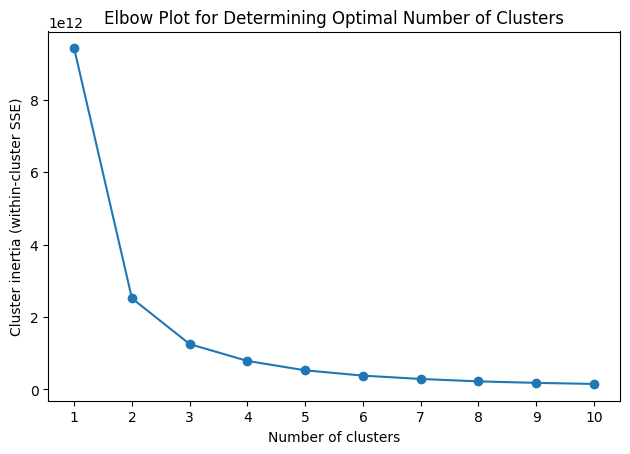

In [13]:
from sklearn.cluster import KMeans

X = df.values
inertias = [] # empty list to store inertia values

# Loop over different values of k to find the optimal number of clusters
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)  # Fit K-means using the PCA-transformed data
    inertias.append(km.inertia_)

# Plotting the elbow plot to observe the 'elbow' point to determine the optimal number of clusters
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Cluster inertia (within-cluster SSE)')
plt.xticks(range(1, 11))
plt.title('Elbow Plot for Determining Optimal Number of Clusters')
plt.tight_layout()
plt.show()


C:\Users\HA VINH NGUYEN\AppData\Local\Temp\ipykernel_36868\3869769359.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color = get_cmap("jet")(float(i) / n_clusters)


Silhouette average for 2 clusters: 0.66


C:\Users\HA VINH NGUYEN\AppData\Local\Temp\ipykernel_36868\3869769359.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color = get_cmap("jet")(float(i) / n_clusters)


Silhouette average for 3 clusters: 0.57


C:\Users\HA VINH NGUYEN\AppData\Local\Temp\ipykernel_36868\3869769359.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color = get_cmap("jet")(float(i) / n_clusters)


Silhouette average for 4 clusters: 0.54


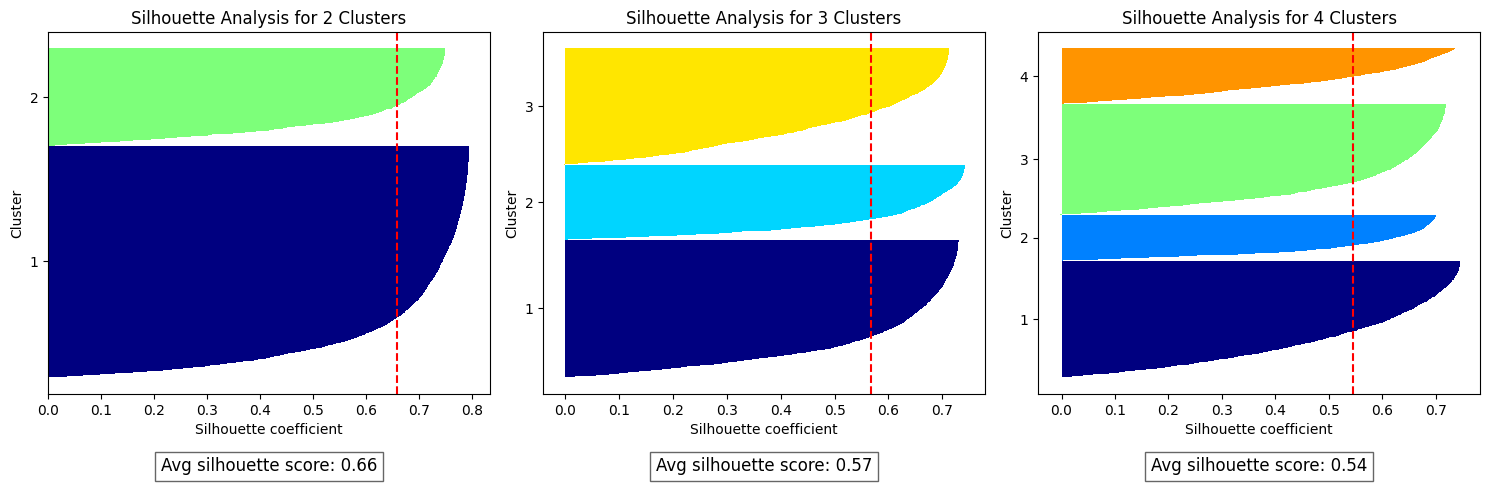

In [14]:
from matplotlib.cm import get_cmap
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples

# Define the number of clusters to test
num_clusters = [2, 3, 4]

# Create subplots with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for idx, n_clusters in enumerate(num_clusters):
    km = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, max_iter=300, random_state=0)
    y_km = km.fit_predict(X)

    cluster_labels = np.unique(y_km)
    silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
    
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []

    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = get_cmap("jet")(float(i) / n_clusters)
        axes[idx].barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouette_vals)
    
    silhouette_avg = np.mean(silhouette_vals)
    print(f'Silhouette average for {n_clusters} clusters: {silhouette_avg:.2f}')

    axes[idx].axvline(silhouette_avg, color="red", linestyle="--")  # plot vertical average line
    axes[idx].set_yticks(yticks)
    axes[idx].set_yticklabels(cluster_labels + 1)
    axes[idx].set_ylabel('Cluster')
    axes[idx].set_xlabel('Silhouette coefficient')
    axes[idx].set_title(f'Silhouette Analysis for {n_clusters} Clusters')

    # Place the silhouette average below the graph
    axes[idx].text(0.5, -0.2, f'Avg silhouette score: {silhouette_avg:.2f}', transform=axes[idx].transAxes, 
                   ha='center', va='center', fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.6))

plt.tight_layout()
plt.show()


In [15]:
# Fit KMeans with selected number of clusters
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0)
kmeans.fit(df)

# Assign clusters to each customer
clusters = kmeans.predict(df)

# Add cluster labels to original DataFrame
k_means_df = df.copy()
k_means_df['kmean-cluster'] = clusters

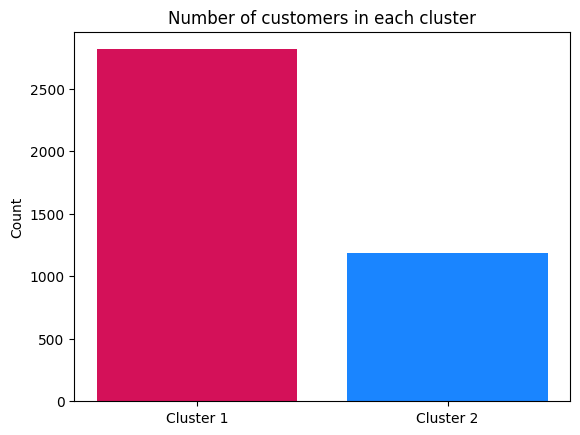

In [16]:
k_means_df = df.copy()
k_means_df['Cluster'] = clusters
cluster_count_kmeans = k_means_df["Cluster"].value_counts()

colors = {"#D41159", "#1A85FF"}
plt.bar(cluster_count_kmeans.index, cluster_count_kmeans.values, color = colors)
plt.title("Number of customers in each cluster")
plt.ylabel("Count")
plt.xticks([0,1], ['Cluster 1', 'Cluster 2'])  
plt.show()



The number of observations in the first cluster is double that of cluster 2.

In [17]:
# Add cluster labels to original DataFrame
k_means_df['kmean-cluster'] = clusters
k_means_df.groupby('kmean-cluster').mean()

,Gender,Marital Status,Education,Settlement Size,Occupation,Income,Age,Cluster
kmean-cluster,,,,,,,,
0,0.579545,0.503906,1.316761,0.920455,0.992543,107414.140625,34.881037,0.0
1,0.275338,0.526182,2.639358,1.493243,1.695946,198426.477196,51.993243,1.0


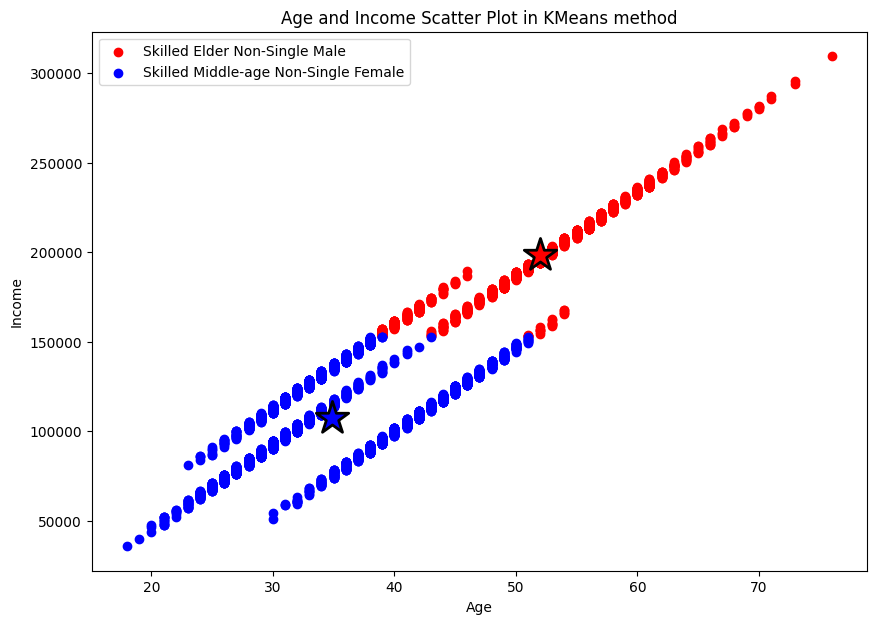

In [18]:
# Compute centroids
centroids = k_means_df.groupby('kmean-cluster').mean()

# Create scatter plot for Age vs Income with different colors for each cluster
plt.figure(figsize=(10, 7))

# Define color map and cluster names
colors = {0:'blue', 1:'red'}
cluster_names = {0: 'Skilled Middle-age Non-Single Female', 1: 'Skilled Elder Non-Single Male'}
centroid_colors = {0:'blue', 1:'red'}

# Create scatter plot
for cluster in k_means_df['kmean-cluster'].unique():
    plt.scatter(k_means_df[k_means_df['kmean-cluster']==cluster]['Age'], 
                k_means_df[k_means_df['kmean-cluster']==cluster]['Income'], 
                c=colors[cluster], 
                label=cluster_names[cluster])

# Add centroids to plot
for cluster in centroids.index:
    plt.scatter(centroids.loc[cluster, 'Age'], 
                centroids.loc[cluster, 'Income'], 
                c=centroid_colors[cluster], 
                marker='*', 
                s=600, 
                edgecolor='black', 
                linewidths=2)

plt.title('Age and Income Scatter Plot in KMeans method')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()

### 3.2 Agglomerative Clustering

In [19]:
from sklearn.cluster import AgglomerativeClustering

# Define the Agglomerative Clustering model
ac = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='complete')
y_ac = ac.fit_predict(X)

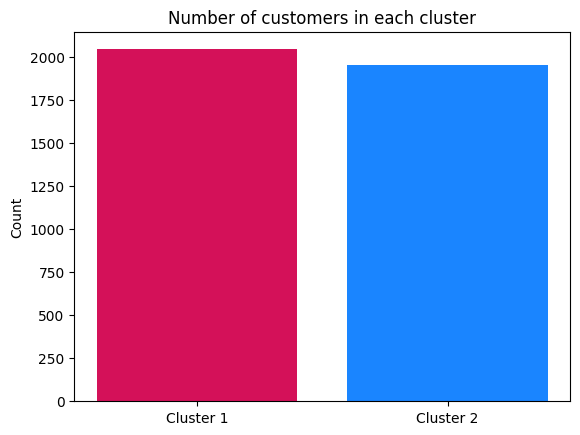

In [20]:
agglomerative_df = df.copy()
agglomerative_df['agg_cluster'] = y_ac
cluster_count_agglomerative = agglomerative_df["agg_cluster"].value_counts()

colors = {"#D41159", "#1A85FF"}
plt.bar(cluster_count_agglomerative.index, cluster_count_agglomerative.values, color = colors)
plt.title("Number of customers in each cluster")
plt.ylabel("Count")
plt.xticks([0,1], ['Cluster 1', 'Cluster 2'])  # Set ticks to show 0 and 1 only
plt.show()


In [21]:
agglomerative_df.groupby("agg_cluster").mean()

,Gender,Marital Status,Education,Settlement Size,Occupation,Income,Age
agg_cluster,,,,,,,
0,0.291789,0.661779,1.930596,0.951124,1.356794,171562.022483,46.502933
1,0.696520,0.352098,1.475435,1.235415,1.037359,95393.690379,33.080860


## 4. K-Means and Agglomerative Clustering Insight Comparison

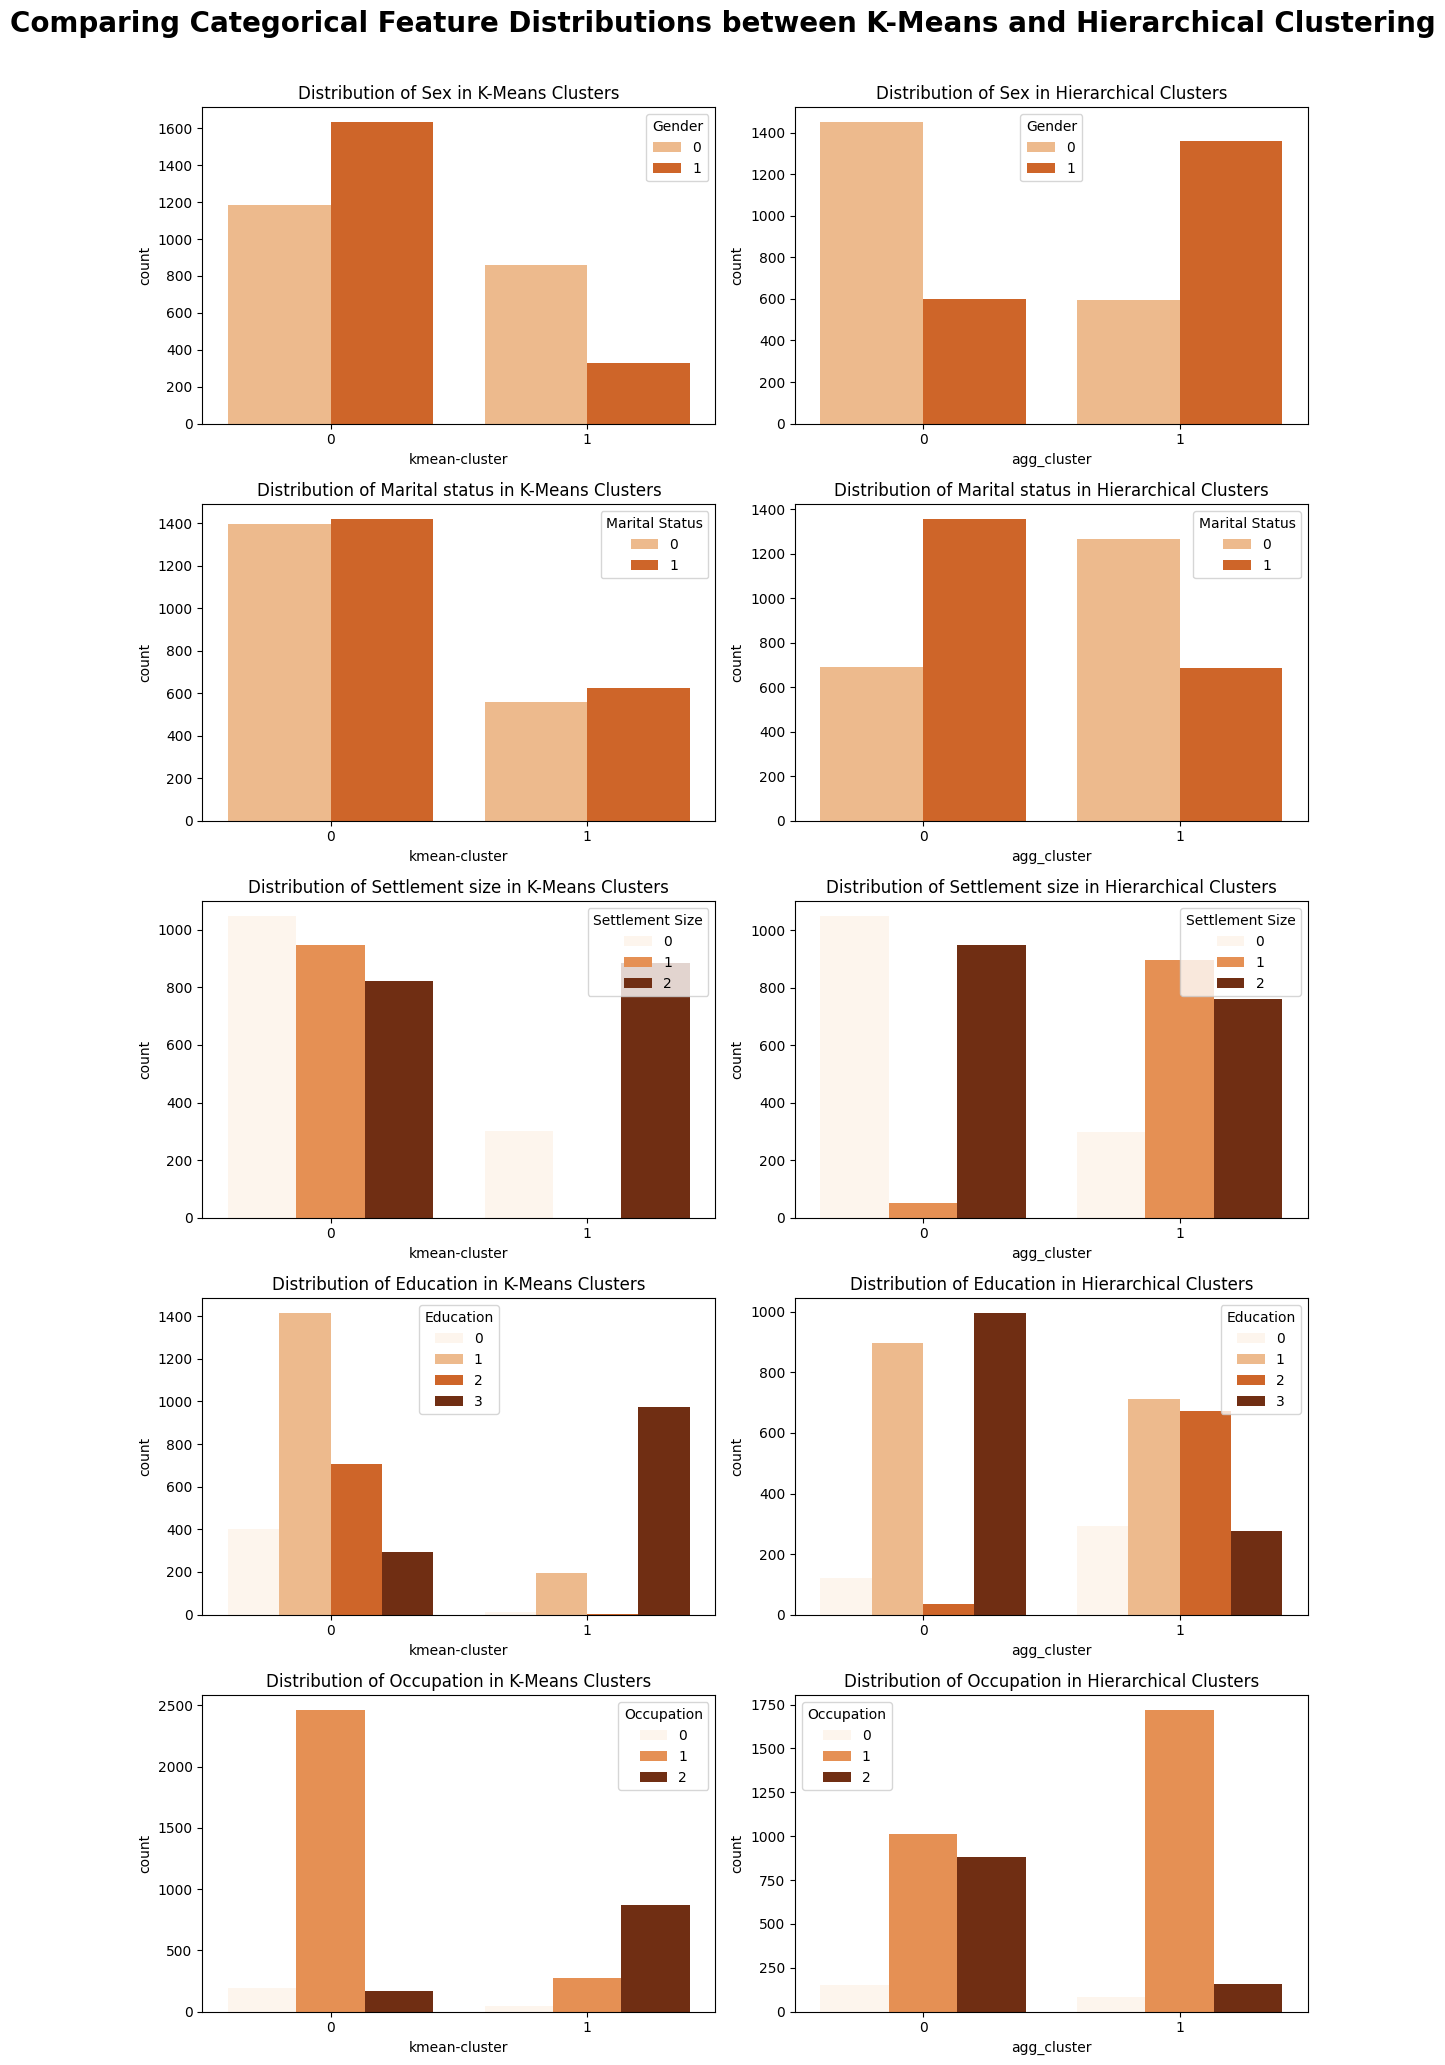

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure with 5 rows and 2 columns
fig, axes = plt.subplots(5, 2, figsize=(12, 20))

# Bar Chart 1: Sex in K-Means Clusters
sns.countplot(ax=axes[0, 0], x='kmean-cluster', hue='Gender', palette='Oranges', data=k_means_df)
axes[0, 0].set_title('Distribution of Sex in K-Means Clusters')

# Bar Chart 1: Sex in Hierarchical Clusters
sns.countplot(ax=axes[0, 1], x='agg_cluster', hue='Gender', palette='Oranges', data=agglomerative_df)
axes[0, 1].set_title('Distribution of Sex in Hierarchical Clusters')

# Bar Chart 2: Marital status in K-Means Clusters
sns.countplot(ax=axes[1, 0], x='kmean-cluster', hue='Marital Status', palette='Oranges', data=k_means_df)
axes[1, 0].set_title('Distribution of Marital status in K-Means Clusters')

# Bar Chart 2: Marital status in Hierarchical Clusters
sns.countplot(ax=axes[1, 1], x='agg_cluster', hue='Marital Status', palette='Oranges', data=agglomerative_df)
axes[1, 1].set_title('Distribution of Marital status in Hierarchical Clusters')

# Bar Chart 3: Settlement size in K-Means Clusters
sns.countplot(ax=axes[2, 0], x='kmean-cluster', hue='Settlement Size', palette='Oranges', data=k_means_df)
axes[2, 0].set_title('Distribution of Settlement size in K-Means Clusters')

# Bar Chart 3: Settlement size in Hierarchical Clusters
sns.countplot(ax=axes[2, 1], x='agg_cluster', hue='Settlement Size', palette='Oranges', data=agglomerative_df)
axes[2, 1].set_title('Distribution of Settlement size in Hierarchical Clusters')

# Bar Chart 4: Education in K-Means Clusters
sns.countplot(ax=axes[3, 0], x='kmean-cluster', hue='Education', palette='Oranges', data=k_means_df)
axes[3, 0].set_title('Distribution of Education in K-Means Clusters')

# Bar Chart 4: Education in Hierarchical Clusters
sns.countplot(ax=axes[3, 1], x='agg_cluster', hue='Education', palette='Oranges', data=agglomerative_df)
axes[3, 1].set_title('Distribution of Education in Hierarchical Clusters')

# Bar Chart 5: Occupation in K-Means Clusters
sns.countplot(ax=axes[4, 0], x='kmean-cluster', hue='Occupation', palette='Oranges', data=k_means_df)
axes[4, 0].set_title('Distribution of Occupation in K-Means Clusters')

# Bar Chart 5: Occupation in Hierarchical Clusters
sns.countplot(ax=axes[4, 1], x='agg_cluster', hue='Occupation', palette='Oranges', data=agglomerative_df)
axes[4, 1].set_title('Distribution of Occupation in Hierarchical Clusters')

# Adjust spacing between subplots
plt.tight_layout()
plt.suptitle('Comparing Categorical Feature Distributions between K-Means and Hierarchical Clustering', fontsize=20, fontweight='bold', y=1.03)

# Show the plots
plt.show()

## 5. Summary

KMeans++ and Agglomerative clustering segmented a dataset of 4,000 customers using variables like age,
gender, income, education, marital status, and settlement size. This resulted in two main segments, enabling
targeted and effective marketing strategies to attract the right customers with the right demands at the right
time.